In [6]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from yolov5.yolov5 import YoloV5

In [8]:
from yolov5.utils.image_loader import ImageLoader
import cv2

img = cv2.imread("/home/zaid/github/traffic-tracker/blob.png")
im, im0 = ImageLoader.PreprocessImage(img)

In [9]:
preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)

In [10]:
bounding_boxes_list = []

for prediction in preds:
    x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
    bounding_boxes_list.append([x_start, y_start, x_end, y_end])
    print(preds[prediction])

{'class': 0, 'bounding_box': {'x_start': 219, 'y_start': 442, 'x_end': 361, 'y_end': 496}, 'confidence': 0.2880098521709442}
{'class': 0, 'bounding_box': {'x_start': 872, 'y_start': 428, 'x_end': 957, 'y_end': 484}, 'confidence': 0.5296167731285095}
{'class': 0, 'bounding_box': {'x_start': 1118, 'y_start': 424, 'x_end': 1177, 'y_end': 462}, 'confidence': 0.5969915390014648}
{'class': 0, 'bounding_box': {'x_start': 430, 'y_start': 714, 'x_end': 872, 'y_end': 972}, 'confidence': 0.7949249744415283}
{'class': 0, 'bounding_box': {'x_start': 897, 'y_start': 443, 'x_end': 1051, 'y_end': 508}, 'confidence': 0.8087260127067566}
{'class': 0, 'bounding_box': {'x_start': 453, 'y_start': 444, 'x_end': 572, 'y_end': 496}, 'confidence': 0.8167880177497864}
{'class': 0, 'bounding_box': {'x_start': 1056, 'y_start': 440, 'x_end': 1136, 'y_end': 489}, 'confidence': 0.8201494812965393}
{'class': 0, 'bounding_box': {'x_start': 547, 'y_start': 442, 'x_end': 674, 'y_end': 493}, 'confidence': 0.8487107157707

In [11]:
for prediction in preds:
    if preds[prediction]["confidence"] > 0.5:
        x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
        if preds[prediction]["class"] == 0:
            color = (0,255,0)
        elif preds[prediction]["class"] == 1:
            color = (255,0,0)
        elif preds[prediction]["class"] == 2:
            color = (0,0,255)
        elif preds[prediction]["class"] == 3:
            color = (0,255,255)
        elif preds[prediction]["class"] == 4:
            color = (255,255,0)
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)

In [12]:
print(img.shape)

(1040, 1920, 3)


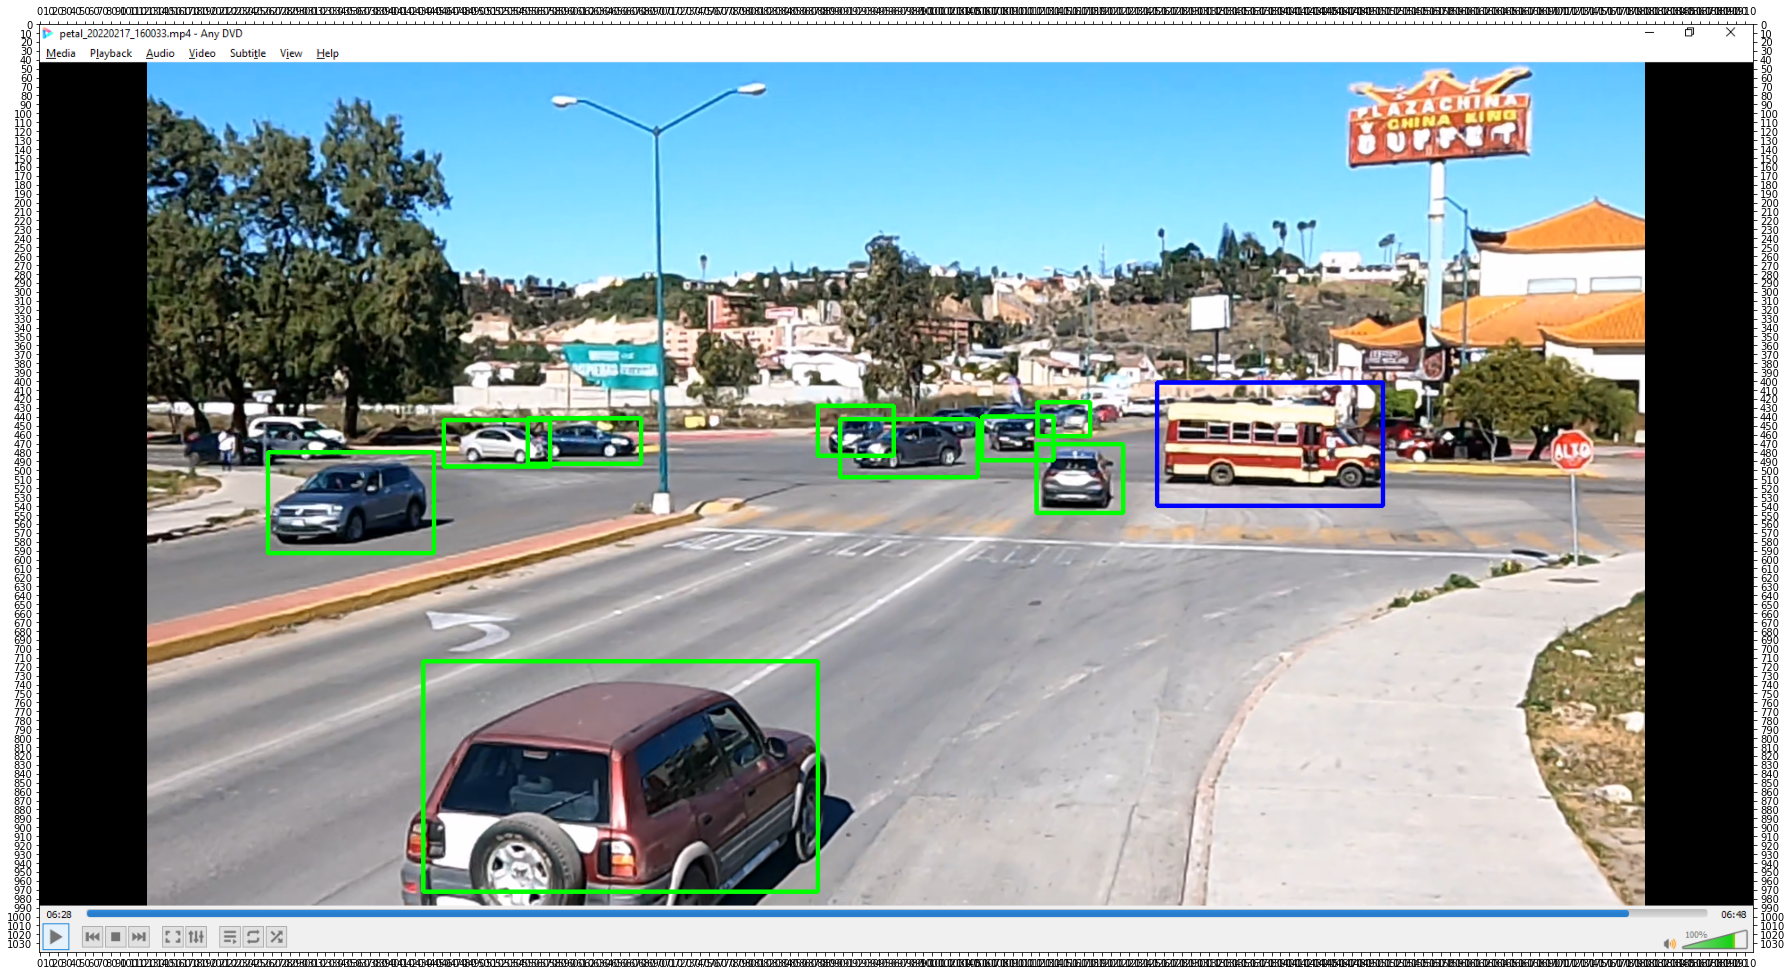

In [13]:
from helpers.plot import plot_image_huge

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image_huge(img)

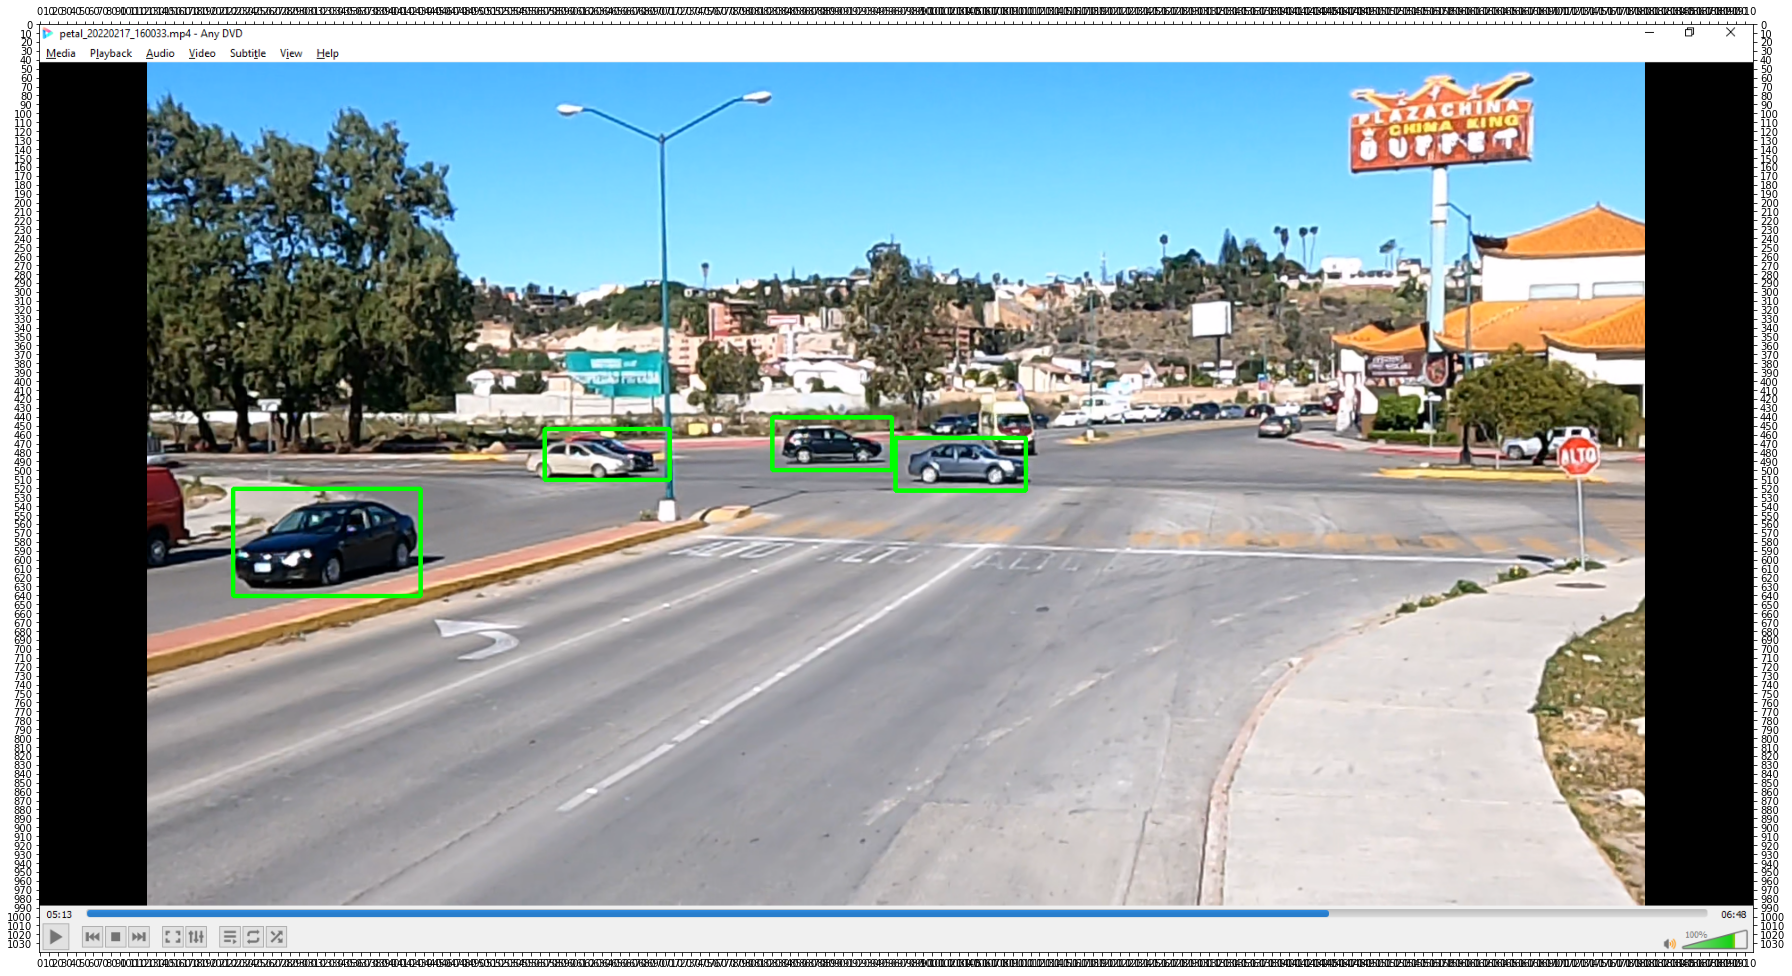

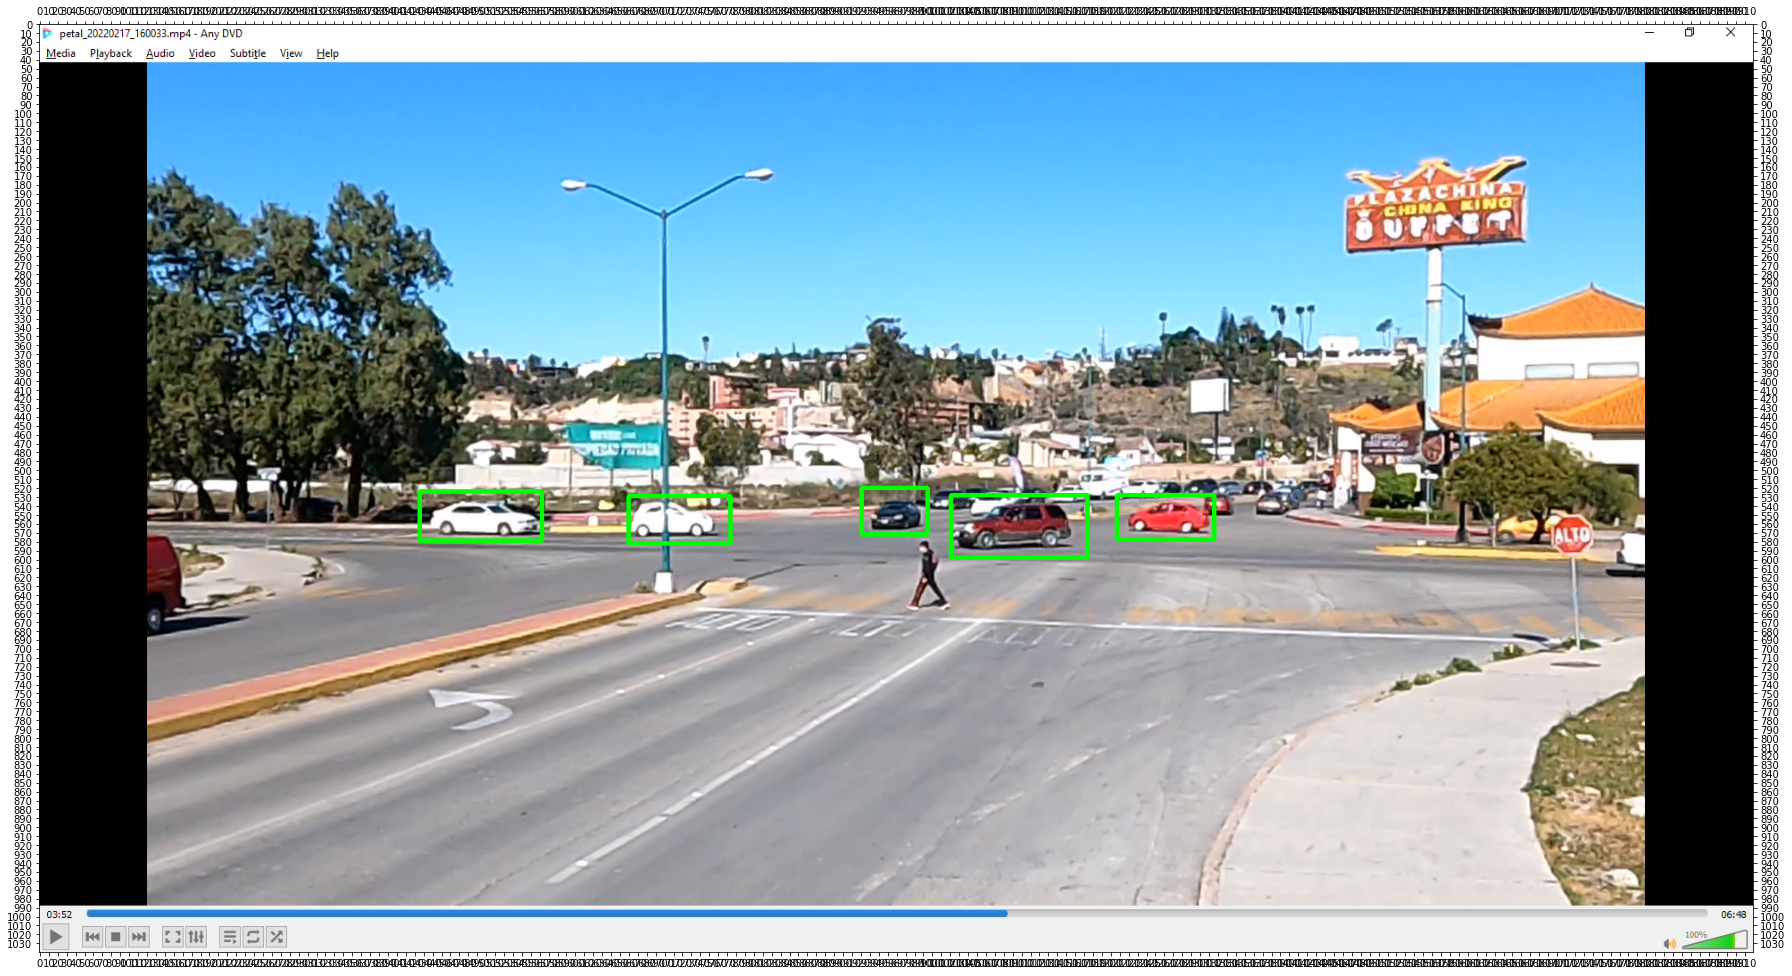

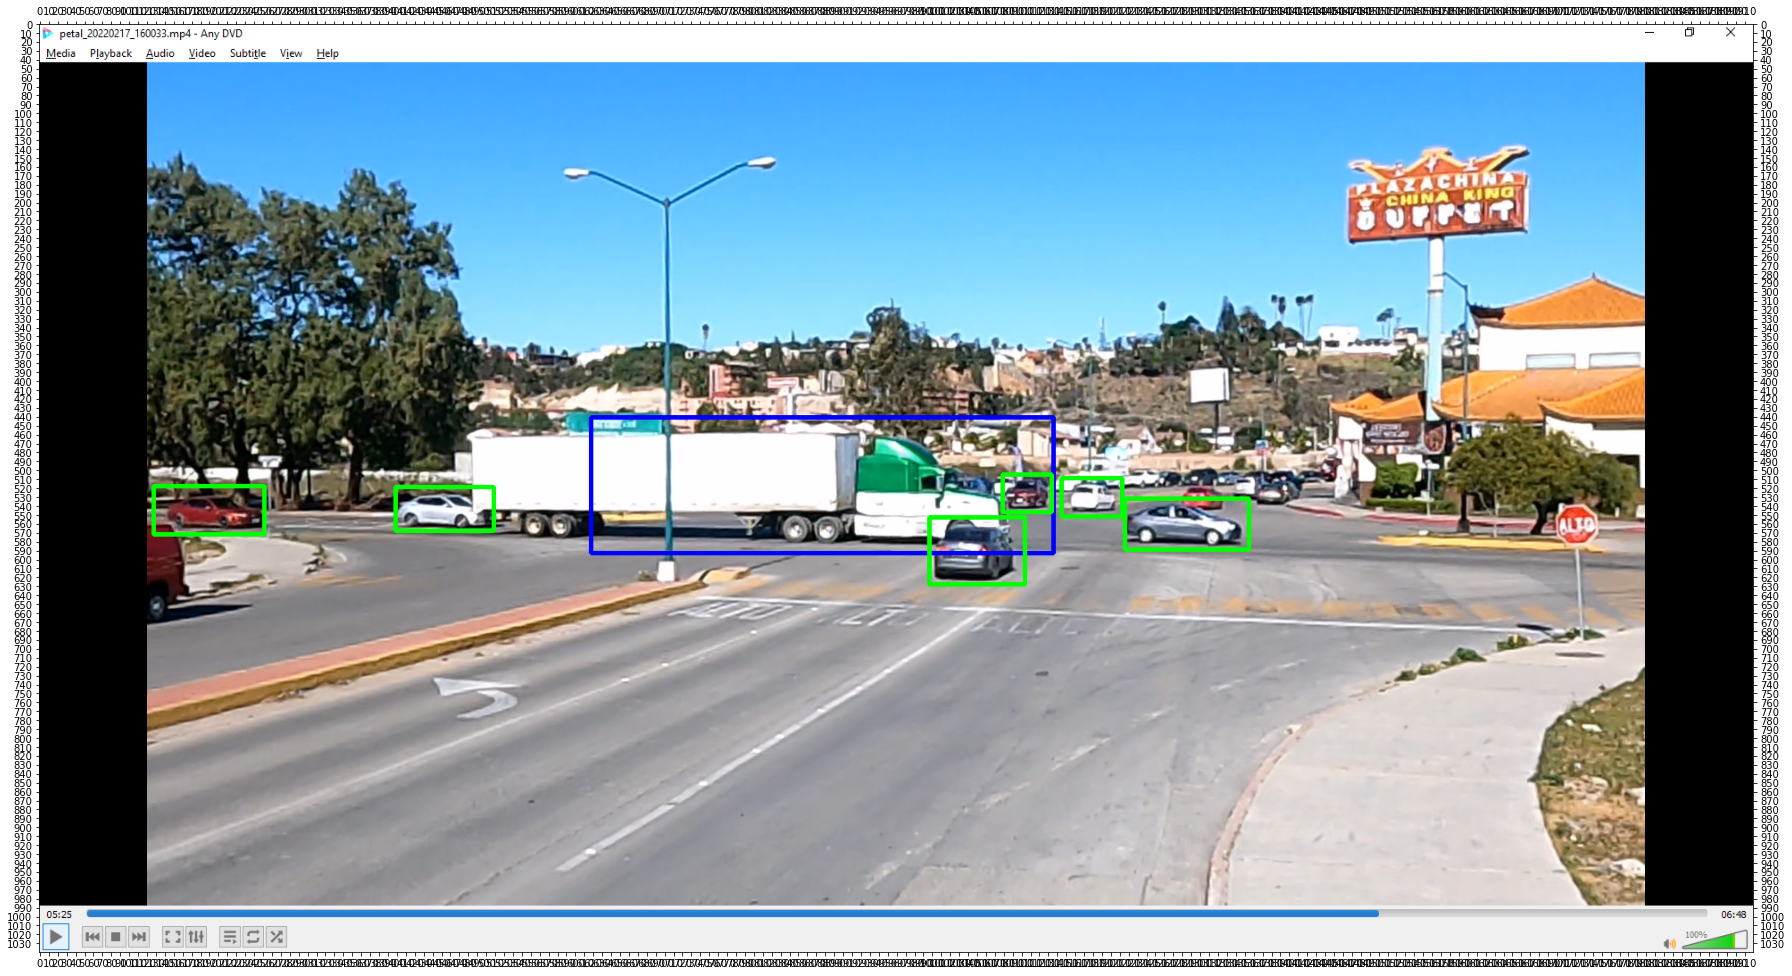

In [14]:
import os

root_path = "/home/zaid/Descargas/base_datos_aforo/"
img_list = [root_path + img_path for img_path in os.listdir(root_path) if img_path[-3:] == "png"]
for img_path in img_list[:3]: 
    img = cv2.imread(img_path)
    im, im0 = ImageLoader.PreprocessImage(img)
    preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)
    for prediction in preds:
        if preds[prediction]["confidence"] > 0.5:
            x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
            if preds[prediction]["class"] == 0:
                color = (0,255,0)
            elif preds[prediction]["class"] == 1:
                color = (255,0,0)
            elif preds[prediction]["class"] == 2:
                color = (0,0,255)
            elif preds[prediction]["class"] == 3:
                color = (0,255,255)
            elif preds[prediction]["class"] == 4:
                color = (255,255,0)
            cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plot_image_huge(img)

In [1]:
from main import main_func

main_func(path_to_video="/home/zaid/github/traffic-tracker/petal_20220217_160339.mp4")

YOLOv5 🚀 a39d5fb torch 1.10.2+cu102 CPU

Fusing layers... 


modelo yolo cargado


Model Summary: 369 layers, 21190557 parameters, 0 gradients, 49.1 GFLOPs


[INFO] starting video stream...


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


frame #1
frame #2
frame #3
frame #4
frame #5
frame #6
frame #7
frame #8
frame #9
frame #10
frame #11
frame #12
frame #13
frame #14
frame #15
frame #16
frame #17
frame #18
frame #19
frame #20
frame #21
frame #22
frame #23
frame #24
frame #25
frame #26
frame #27
frame #28
frame #29
frame #30
frame #31
frame #32
[INFO] elapsed time: 17.06
[INFO] approx. FPS: 1.88


AttributeError: 'cv2.VideoCapture' object has no attribute 'stop'